In [5]:
import os
import pandas as pd
from config import BASE_DIR, OUTPUT_DIR

def display_data():
    """保存されたデータを順番に読み込んで表示する関数"""
    # 読み込むファイルのリスト
    files = [
        ("raw", "btc_spot_prices"),
        ("raw", "btc_futures_prices"),
        ("processed", "btc_basis"),
       ("analysis", "basis_with_ma")
    ]
    
    for subfolder, filename in files:
        file_path = os.path.join(OUTPUT_DIR, subfolder, f"{filename}.parquet")
        if os.path.exists(file_path):
            display(f"\n===== {subfolder}/{filename} =====")
            df = pd.read_parquet(file_path)
            display(df.tail())
        else:
            display(f"ファイルが見つかりません: {file_path}")

if __name__ == "__main__":
    display_data()

'\n===== raw/btc_spot_prices ====='

,open_time,open,high,low,close,volume,close_time,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume,ignore
86,2025-04-06,83537.99,83817.63,77153.83,78430.00,27942.71436,2025-04-06 23:59:59.999,2.239085e+09,3948493,12493.84490,1.001460e+09,0
87,2025-04-07,78430.00,81243.58,74508.00,79163.24,78387.53089,2025-04-07 23:59:59.999,6.084614e+09,9736596,39075.84274,3.034375e+09,0
88,2025-04-08,79163.24,80867.99,76239.90,76322.42,35317.32063,2025-04-08 23:59:59.999,2.775278e+09,5512751,15704.73031,1.235371e+09,0
89,2025-04-09,76322.42,83588.00,74620.00,82615.22,75488.28772,2025-04-09 23:59:59.999,5.980231e+09,7741252,39491.62958,3.137004e+09,0
90,2025-04-10,82615.22,82753.21,81292.99,81802.68,12202.61143,2025-04-10 23:59:59.999,1.000892e+09,1584716,6208.20229,5.094766e+08,0


'\n===== raw/btc_futures_prices ====='

,open_time,open,high,low,close,volume,close_time,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume,ignore
86,2025-04-06,83506.1,83790.5,77111.0,78390.0,281191.753,2025-04-06 23:59:59.999,2.258293e+10,4458658,135853.523,1.090630e+10,0
87,2025-04-07,78390.1,81200.0,74457.0,79140.0,693843.503,2025-04-07 23:59:59.999,5.393710e+10,10521238,346063.905,2.691197e+10,0
88,2025-04-08,79140.1,80832.1,76200.1,76297.9,328409.534,2025-04-08 23:59:59.999,2.579658e+10,5357269,164156.315,1.289208e+10,0
89,2025-04-09,76298.0,83554.9,74578.5,82588.0,560649.862,2025-04-09 23:59:59.999,4.407232e+10,8799174,279060.371,2.194155e+10,0
90,2025-04-10,82587.9,82706.9,81241.1,81757.5,90838.182,2025-04-10 23:59:59.999,7.440530e+09,1639617,44762.086,3.666313e+09,0


'\n===== processed/btc_basis ====='

,date,spot_close,futures_close,basis,basis_percent
86,2025-04-06,78430.00,78390.0,-40.00,-0.051001
87,2025-04-07,79163.24,79140.0,-23.24,-0.029357
88,2025-04-08,76322.42,76297.9,-24.52,-0.032127
89,2025-04-09,82615.22,82588.0,-27.22,-0.032948
90,2025-04-10,81802.68,81757.5,-45.18,-0.055230


'\n===== analysis/basis_with_ma ====='

,date,spot_close,futures_close,basis,basis_percent,basis_ma7,basis_percent_ma7
86,2025-04-06,78430.00,78390.0,-40.00,-0.051001,-33.312857,-0.040334
87,2025-04-07,79163.24,79140.0,-23.24,-0.029357,-31.988571,-0.038902
88,2025-04-08,76322.42,76297.9,-24.52,-0.032127,-30.142857,-0.037211
89,2025-04-09,82615.22,82588.0,-27.22,-0.032948,-29.575714,-0.036518
90,2025-04-10,81802.68,81757.5,-45.18,-0.055230,-31.517143,-0.038985


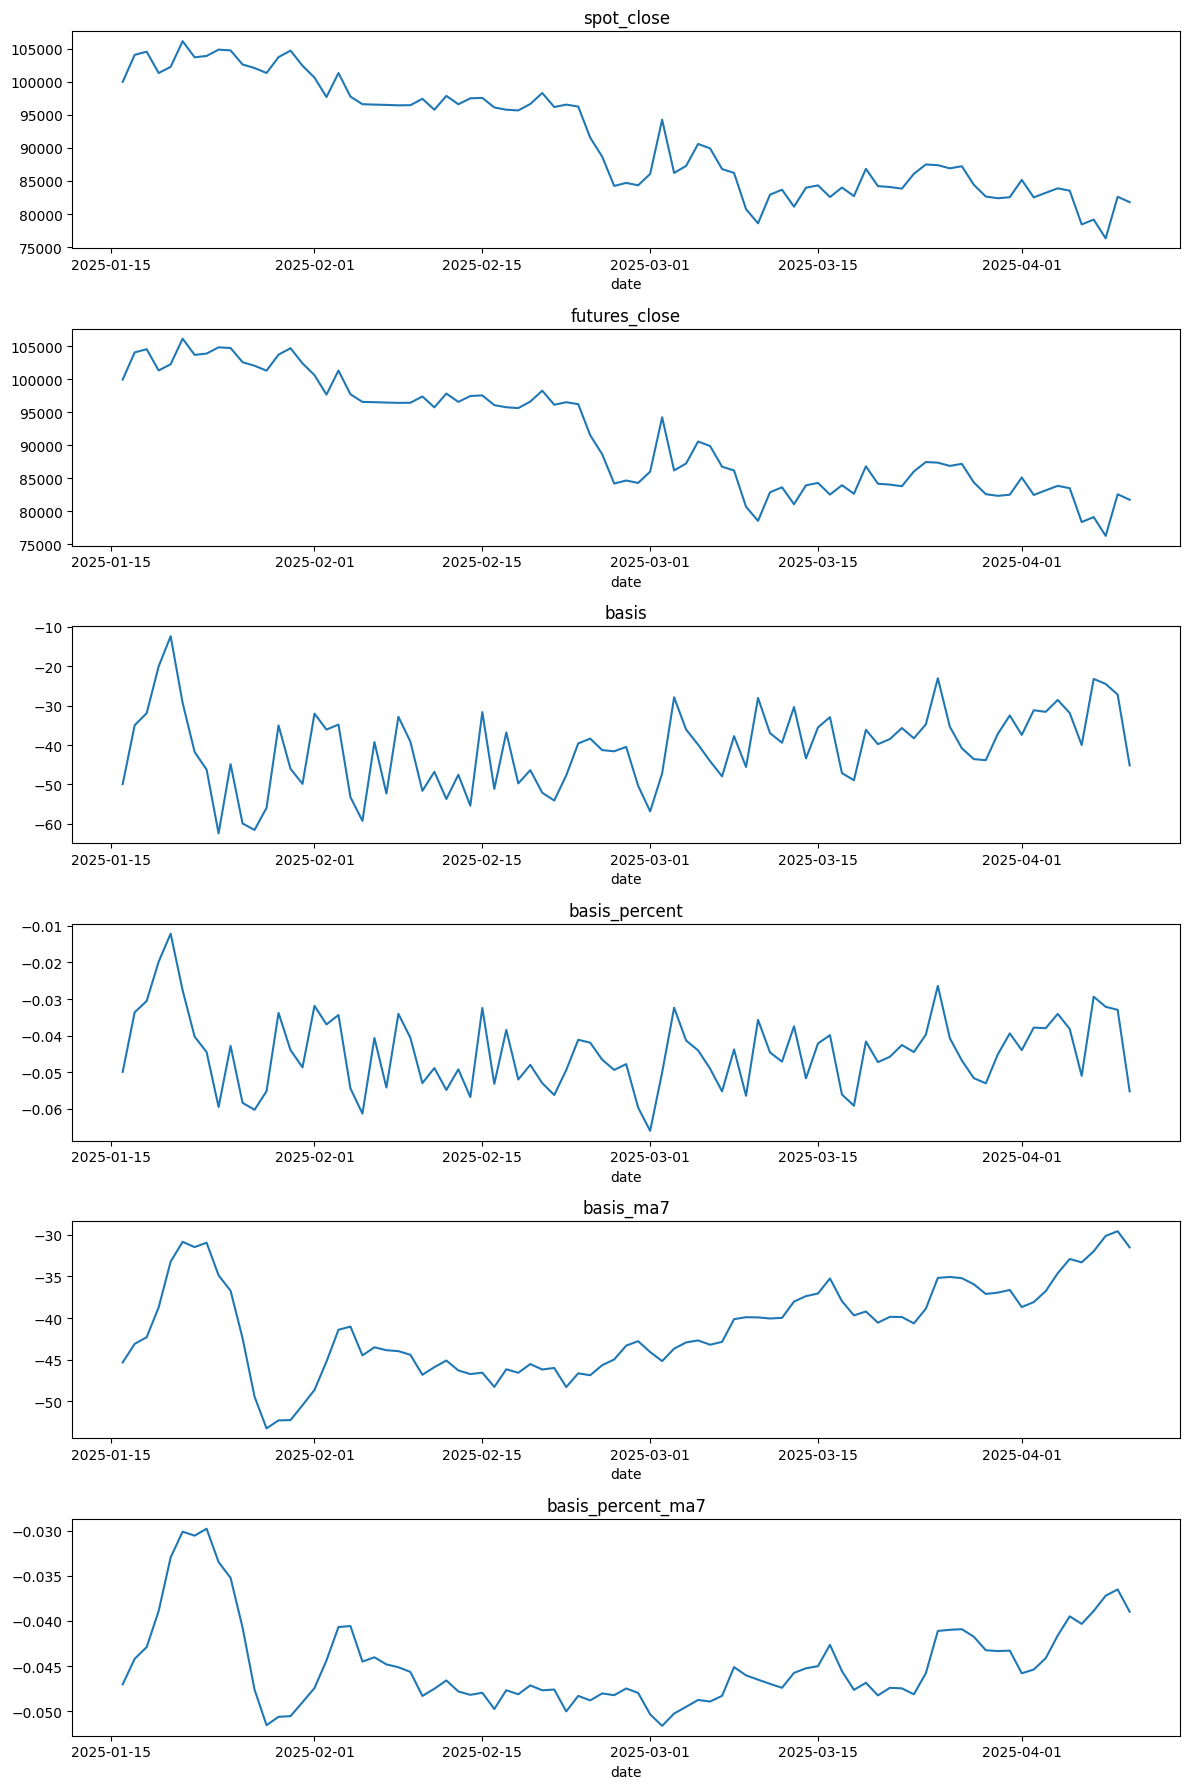

In [11]:
import os
import pandas as pd
import matplotlib.pyplot as plt

file_path = os.path.join(OUTPUT_DIR, "analysis", "basis_with_ma.parquet")

# DataFrameの読み込み
df = pd.read_parquet(file_path).dropna().set_index("date")

# サブプロットでデータをプロット
fig, axes = plt.subplots(nrows=len(df.columns), figsize=(12, 3*len(df.columns)))
for i, col in enumerate(df.columns):
    df[col].plot(ax=axes[i], title=col)
    
plt.tight_layout()
plt.show()
